# This is trial for comparing evaluation result

1. Correlation map difference with control experiment
2. RMSE map difference with control experimnet
3. AUC map difference with control experiment
4. ROC curve of AUC_mean of all experiments
5. TF_bar of all experiments
6. bimodal_bar of all experiments

## [experiment] world_5x5_continuous

### MJJASO, JJA, JAS, ASO

- control (msot)
- soil moisture
- snow coverage
- sea surface temperature
- temperature of soil layer
- SST + MOISTURE
- SST + SNOW
- SST + SOIL TEMPERATURE

## [experiment] thailand_1x1_continuous

### MJJASO, JJA, JAS, ASO

- control (msot)
- soil moisture
- snow coverage
- sea surface temperature
- temperature of soil layer
- SST + MOISTURE
- SST + SNOW
- SST + SOIL TEMPERATURE

In [2]:
import numpy as np
import pickle
from scipy import stats
from sklearn.metrics import auc
import matplotlib.pyplot as plt

In [3]:
# world_5x5_continuous MJJASO

result_msot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                     f"/predictors_coarse_std_Apr_msot-pr_5x5_coarse_std_MJJASO_world" \
                     f"/epoch100_batch256_seed1.npy"
val_msot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                  f"/predictors_coarse_std_Apr_msot-pr_5x5_coarse_std_MJJASO_world.pickle"

result_m_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                  f"/predictors_coarse_std_Apr_m-pr_5x5_coarse_std_MJJASO_world" \
                  f"/epoch100_batch256_seed1.npy"
val_m_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                  f"/predictors_coarse_std_Apr_m-pr_5x5_coarse_std_MJJASO_world.pickle"

result_s_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                  f"/predictors_coarse_std_Apr_s-pr_5x5_coarse_std_MJJASO_world" \
                  f"/epoch100_batch256_seed1.npy"
val_s_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
               f"/predictors_coarse_std_Apr_s-pr_5x5_coarse_std_MJJASO_world.pickle"

result_o_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                  f"/predictors_coarse_std_Apr_o-pr_5x5_coarse_std_MJJASO_world" \
                  f"/epoch100_batch256_seed1.npy"
val_o_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
               f"/predictors_coarse_std_Apr_o-pr_5x5_coarse_std_MJJASO_world.pickle"

result_t_MJJASO =    f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                     f"/predictors_coarse_std_Apr_t-pr_5x5_coarse_std_MJJASO_world" \
                     f"/epoch100_batch256_seed1.npy"
val_t_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
               f"/predictors_coarse_std_Apr_t-pr_5x5_coarse_std_MJJASO_world.pickle"

result_mo_MJJASO =   f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
              f"/predictors_coarse_std_Apr_mo-pr_5x5_coarse_std_MJJASO_world" \
              f"/epoch100_batch256_seed1.npy"
val_mo_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                f"/predictors_coarse_std_Apr_mo-pr_5x5_coarse_std_MJJASO_world.pickle"

result_so_MJJASO =  f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                    f"/predictors_coarse_std_Apr_so-pr_5x5_coarse_std_MJJASO_world" \
                    f"/epoch100_batch256_seed1.npy"
val_so_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                f"/predictors_coarse_std_Apr_so-pr_5x5_coarse_std_MJJASO_world.pickle"

result_ot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/result/continuous/world/5x5" \
                   f"/predictors_coarse_std_Apr_ot-pr_5x5_coarse_std_MJJASO_world" \
                   f"/epoch100_batch256_seed1.npy"
val_ot_MJJASO = f"/docker/mnt/d/research/D2/cnn3/train_val/continuous" \
                f"/predictors_coarse_std_Apr_ot-pr_5x5_coarse_std_MJJASO_world.pickle" 

In [4]:
# loading validation input and predicted result
def load_pred(path, result_path):
    with open(path, 'rb') as f:
        data = pickle.load(f)
    x_val, y_val = data['x_val'], data['y_val']
    pred_arr = np.squeeze(np.load(result_path))
    return x_val, y_val, pred_arr

# ROC curve of AUC_mean of all experiments
def roc(sim, obs, percentile=20):
    sim = np.abs(sim)
    obs = np.abs(obs)
    
    sim_per =np.percentile(sim, percentile)
    obs_per = np.percentile(obs, percentile)
    
    over_per = sum(obs > obs_per)
    under_per = sum(obs <= obs_per)
    
    hit_count = 0
    false_count = 0
    for p in range(len(obs)):
        if sim[p] > sim_per and obs[p] > obs_per:
            hit_count += 1
        elif sim[p] > sim_per and obs[p] <= obs_per:
            false_count += 1
            
    hr = hit_count/over_per
    far = false_count/under_per
    
    return hr, far

def auc_sample_mean(sim, obs):
    """
    input: validation sample
        Calculation based on percentile of 1000 validation samples in each pixcel
        pred.T -> sim: (1000, 1728)
        y_val -> obs: (1000, 1728)
    output: AUC of pixcel map
    
    number of AUC -> pixcel map
    """
    # percentile variation list
    per_list = np.arange(10, 100, 10) # 10...90
    per_list = per_list[::-1]
    
    # result(11, 2, 1728) -> (percentile, hr or far, pixcel)
    result = []
    
    # initialize hr & far
    hr_all, far_all = [], []
    for i in range(len(obs.T)):
        hr_all.append(0)
        far_all.append(0)
    result.append([hr_all, far_all])
    
    # different percentile hr & far
    for per in per_list:
        # calculate multiple varidatoin events
        # len=1728
        hr_all, far_all = [], []
        # calculate roc
        for px in range(len(obs.T)):
            hr_n, far_n = roc(sim[:, px],
                              obs[:, px],
                              percentile=per)
            hr_all.append(hr_n)
            far_all.append(far_n)
        result.append([hr_all, far_all])
        
    # summerize hr & far
    hr_all, far_all = [], []
    for i in range(len(obs.T)):
        hr_all.append(1)
        far_all.append(1)
    result.append([hr_all, far_all])
    
    # result(11, 2, 1728)
    result = np.array(result)
    
    # calculate auc_all
    auc_all = []
    for px in range(len(obs.T)):
        fpr = result[:, 1, px]
        fpr = np.sort(fpr)
        tpr = result[:, 0, px]
        tpr = np.sort(tpr)
        AUC = auc(fpr, tpr)
        auc_all.append(AUC)
    auc_all = np.array(auc_all)
    
    # calculate 95% intervals
    n = len(auc_all)
    sample_mean = np.mean(auc_all)
    sample_var = stats.tvar(auc_all)
    interval = stats.norm.interval(alpha=0.95,
                                   loc=sample_mean,
                                   scale=np.sqrt(sample_var/n))
    print(f"auc_95%reliable_mean {sample_mean} spans {interval}")
    
    # hr_mean(11, far_mean(11)
    hr_mean = np.mean(result[:, 0, :], axis=1)
    far_mean = np.mean(result[:, 1, :], axis=1)
    result_mean = np.array([hr_mean, far_mean])
    result_mean = result_mean.T #(11, 2)
    
    # mean_auc
    fpr = result_mean[:, 1]
    tpr = result_mean[:, 0]
    mean_auc = auc(fpr, tpr)
    
    return result, result_mean, auc_all, mean_auc

In [7]:
def draw_roc_curve(roc_array, auc_array, name_list, color_list):
    fig, ax = plt.subplots(figsize=(6, 6))
    
    # draw cnn_continuous line
    for i in range(len(name_list)):
        plt.plot(roc_array[i, :, 1], #fpr
                 roc_array[i, :, 0], # tpr
                 label=f"experiment[{name_list[i]}] (AUC = {auc_array[i]})",
                 color=color_list[i],
                 linestyle=":",
                 linewidth=4)

        # plot cnn_continuous percentile results
        plt.scatter(roc_array[i, :, 1], #fpr
                    roc_array[i, :, 0], # tpr
                    s=100,
                    color=color_list[i])
    
    plt.axis("square")
    plt.xlabel("FPR[False Positive Rate]")
    plt.ylabel("TPR[True Positive Rate]")
    plt.title("cnn_continuous_pr_1x1")
    plt.legend()
    plt.show()

experiment result of msot
auc_95%reliable_mean 0.9416228990797783 spans (0.9409463766738874, 0.9422994214856691)
experiment result of m
auc_95%reliable_mean 0.8503941557484607 spans (0.8492440674569226, 0.8515442440399987)
experiment result of s
auc_95%reliable_mean 0.740333430259305 spans (0.7394084594484152, 0.7412584010701948)
experiment result of o
auc_95%reliable_mean 0.8990359153080667 spans (0.8978755525660218, 0.9001962780501116)
experiment result of t
auc_95%reliable_mean 0.816916994057994 spans (0.8157655969197583, 0.8180683911962298)


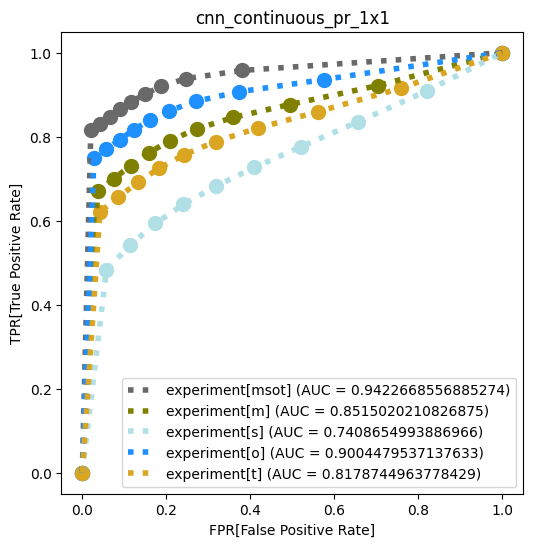

In [8]:
input_path_list = [val_msot_MJJASO,
                   val_m_MJJASO,
                   val_s_MJJASO,
                   val_o_MJJASO,
                   val_t_MJJASO]
result_path_list = [result_msot_MJJASO,
                    result_m_MJJASO,
                    result_s_MJJASO,
                    result_o_MJJASO,
                    result_t_MJJASO]
name_list = ['msot', 'm', 's', 'o', 't']
color_list = ['dimgrey', 'olive', 'powderblue', 'dodgerblue', 'goldenrod']

# result_mean has (11, 2)shape
roc_list = []
auc_list = []
for inp, res, name in zip(input_path_list, result_path_list, name_list):
    print(f"experiment result of {name}")
    x_val, y_val, pred = load_pred(inp, res)
    result, result_mean, auc_all, mean_auc = auc_sample_mean(pred.T, y_val)
    roc_list.append(result_mean)
    auc_list.append(mean_auc)
roc_array = np.array(roc_list)
auc_array = np.array(auc_list)
    
# draw comparison graphs
draw_roc_curve(roc_array, auc_array, name_list, color_list)